<a href="https://colab.research.google.com/github/arjunsekhon/british-airways-data-science/blob/main/ba_task_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | A nightmare journey courtesy o...
1,✅ Trip Verified | Absolutely atrocious. LHR-OR...
2,✅ Trip Verified | As someone who flies relentl...
3,✅ Trip Verified | Flew with British Airways ...
4,✅ Trip Verified | Straightforward check in T...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Step 2: Data Cleaning

This involves handling text normalization, removal of special characters, and removing unwanted entries

In [5]:
import re

def clean(text):
    # Step 1: Remove "trip verified" or "not verified" from the text
    text = re.sub(r'(trip verified|not verified)', '', str(text), flags=re.IGNORECASE)

    # Step 2: Remove all special characters and numericals, leaving only alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)

    # Step 3: Convert the text to lowercase
    text = text.lower()

    return text

# Apply the clean function to the reviews column
df['cleaned reviews'] = df['reviews'].apply(clean)

In [6]:
df.head(10)

,reviews,cleaned reviews
0,Not Verified | A nightmare journey courtesy o...,a nightmare journey courtesy of british airwa...
1,✅ Trip Verified | Absolutely atrocious. LHR-OR...,absolutely atrocious lhr ord lhr round trip b...
2,✅ Trip Verified | As someone who flies relentl...,as someone who flies relentlessly with britis...
3,✅ Trip Verified | Flew with British Airways ...,flew with british airways club europe on satu...
4,✅ Trip Verified | Straightforward check in T...,straightforward check in t new site for club ...
5,Not Verified | I am beyond upset and disgusted...,i am beyond upset and disgusted with the disr...
6,✅ Trip Verified | I purchased round trip dir...,i purchased round trip direct flight business...
7,Not Verified | I booked two business class sea...,i booked two business class seats we had a me...
8,Not Verified | Although all four flights were ...,although all four flights were delayed the se...
9,✅ Trip Verified | Flight changed just one da...,flight changed just one day before from briti...


#Step 3: Stop Word Removal

In [7]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Set up the English stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply the function to the cleaned reviews
df['removed stopwords reviews'] = df['cleaned reviews'].apply(remove_stopwords)

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews,cleaned reviews,removed stopwords reviews
0,Not Verified | A nightmare journey courtesy o...,a nightmare journey courtesy of british airwa...,nightmare journey courtesy british airways wor...
1,✅ Trip Verified | Absolutely atrocious. LHR-OR...,absolutely atrocious lhr ord lhr round trip b...,absolutely atrocious lhr ord lhr round trip br...
2,✅ Trip Verified | As someone who flies relentl...,as someone who flies relentlessly with britis...,someone flies relentlessly british airways bus...
3,✅ Trip Verified | Flew with British Airways ...,flew with british airways club europe on satu...,flew british airways club europe saturday st a...
4,✅ Trip Verified | Straightforward check in T...,straightforward check in t new site for club ...,straightforward check new site club check work...


# Step 4: Perform Sentiment Analysis using Vader


In [10]:
pip install vaderSentiment

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment'] = df['removed stopwords reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(classify_sentiment)
df.head()

,reviews,cleaned reviews,removed stopwords reviews,sentiment,sentiment_category
0,Not Verified | A nightmare journey courtesy o...,a nightmare journey courtesy of british airwa...,nightmare journey courtesy british airways wor...,-0.6486,negative
1,✅ Trip Verified | Absolutely atrocious. LHR-OR...,absolutely atrocious lhr ord lhr round trip b...,absolutely atrocious lhr ord lhr round trip br...,-0.9674,negative
2,✅ Trip Verified | As someone who flies relentl...,as someone who flies relentlessly with britis...,someone flies relentlessly british airways bus...,0.7269,positive
3,✅ Trip Verified | Flew with British Airways ...,flew with british airways club europe on satu...,flew british airways club europe saturday st a...,-0.8225,negative
4,✅ Trip Verified | Straightforward check in T...,straightforward check in t new site for club ...,straightforward check new site club check work...,0.8176,positive


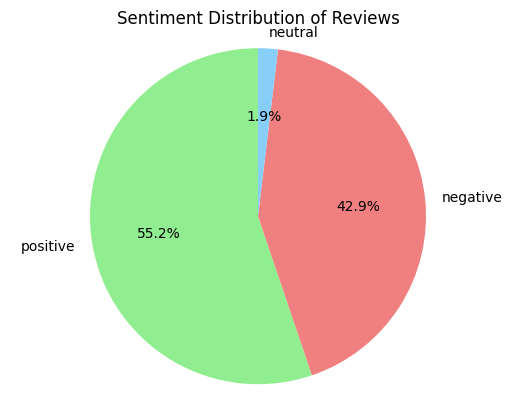

In [10]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Define labels and values for the pie chart
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightskyblue'])

plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')
plt.show()

#Step 5: Create Word Cloud


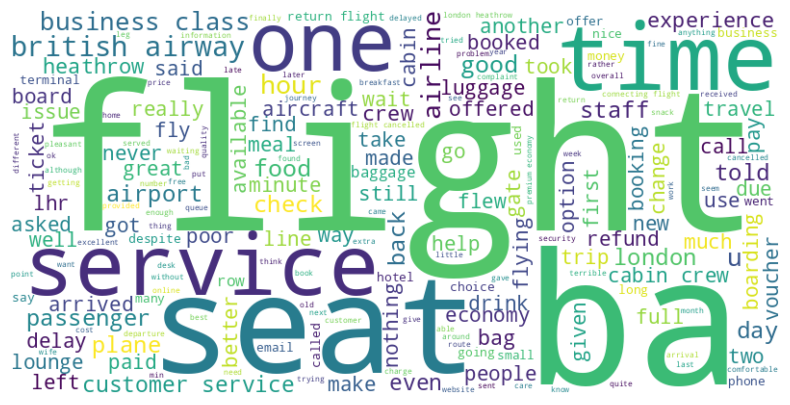

In [13]:
from wordcloud import WordCloud

# Combine all the reviews into one large string
all_reviews = ' '.join(df['removed stopwords reviews'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Get bit more data to incorporate into the powerpoint

In [14]:
# Count the number of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

print(sentiment_counts)

sentiment_category
positive    552
negative    429
neutral      19
Name: count, dtype: int64
